In [1]:
import os
import cv2
import numpy as np
from tqdm import tqdm

# Paths
dataset_path = r"C:\Users\nshre\OneDrive\Desktop\DeepVision\dataset\crowd"
output_folder = r"C:\Users\nshre\OneDrive\Desktop\DeepVision\dataset\density_maps"

# Create output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Allowed image formats
valid_ext = [".jpg", ".jpeg", ".png"]

# List image files
images = [f for f in os.listdir(dataset_path) if f.lower().endswith(tuple(valid_ext))]
print("Total images found:", len(images))

# Resize dimensions
IMG_HEIGHT = 224
IMG_WIDTH = 224

Y = []  # list to store density maps as numpy arrays

for img_name in tqdm(images, desc="Generating Density Maps"):
    img_path = os.path.join(dataset_path, img_name)

    # Load image
    img = cv2.imread(img_path)
    if img is None:
        print(f"Skipping corrupted: {img_name}")
        continue

    #Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    #Apply Gaussian blur → simulate crowd density
    density = cv2.GaussianBlur(gray, (25, 25), 0)

    #Normalize to 0–1
    density = density / density.max()

    #Resize to model input size
    density = cv2.resize(density, (IMG_HEIGHT, IMG_WIDTH))

    # Add to list
    Y.append(density)

    # Save density map as image (scaled to 0–255)
    save_img = (density * 255).astype(np.uint8)
    save_path = os.path.join(output_folder, f"density_{img_name}")
    cv2.imwrite(save_path, save_img)

# Convert list to numpy array
Y = np.array(Y)
print("Density Map Generation Completed!")
print("Density dataset size:", Y.shape)

# Save as .npy file
np.save("Y_density.npy", Y)
print("Saved → Y_density.npy")


Total images found: 100


Generating Density Maps: 100%|███████████████████████████████████████████████████████| 100/100 [00:41<00:00,  2.42it/s]

Density Map Generation Completed!
Density dataset size: (100, 224, 224)
Saved → Y_density.npy


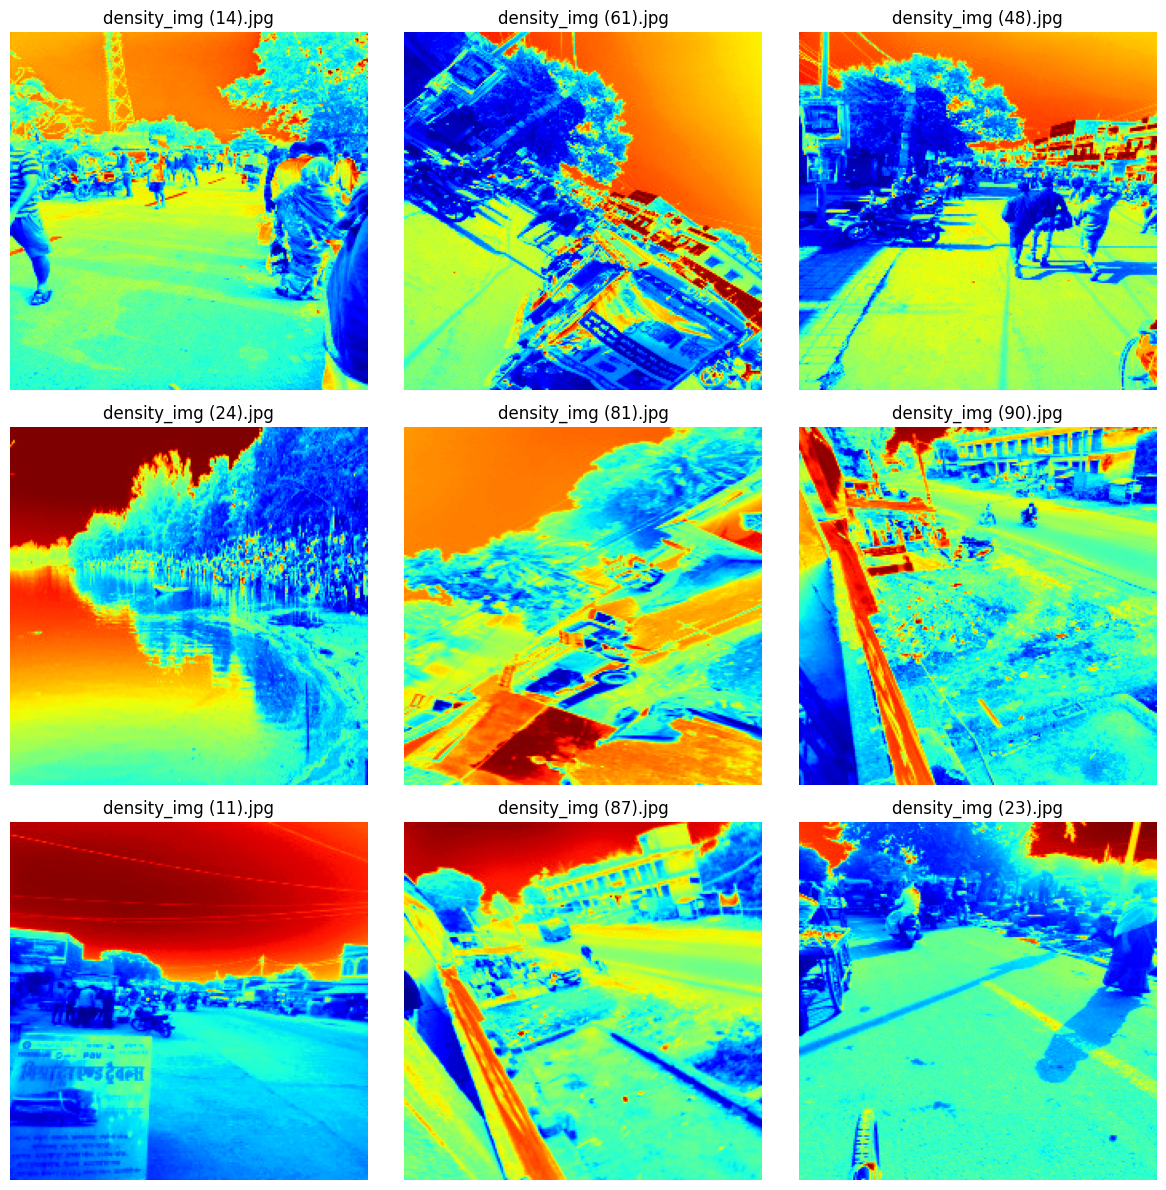

In [2]:
import os
import cv2
import matplotlib.pyplot as plt
import random

# Path to the density maps folder
density_folder = r"C:\Users\nshre\OneDrive\Desktop\DeepVision\dataset\density_maps"

# List all density map images
density_images = [f for f in os.listdir(density_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

# Number of images to display
num_images = 9
sample_images = random.sample(density_images, min(num_images, len(density_images)))

# Plot images in a grid
plt.figure(figsize=(12, 12))

for i, img_name in enumerate(sample_images):
    img_path = os.path.join(density_folder, img_name)
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Load as grayscale

    plt.subplot(3, 3, i + 1)
    plt.imshow(img, cmap='jet')  # Use 'jet' colormap for heatmap effect
    plt.title(img_name)
    plt.axis('off')

plt.tight_layout()
plt.show()
